---
**Chapter 07**
# **Working with Keras: A deep dive**
---

In [1]:
from tensorflow import keras
import tensorflow as tf
import numpy as np

---
# **Graphviz**
---

| Step |Detail |
| --- | ---|
| Step 01 | pip install pydot |
| Step 02 (Linux) | sudo apt install graphviz |
| Step 02 (Mac)   | brew install graphviz |
| Step 03 (Linux) | pip install pygraphviz |
| Step 03 (Mac) | [pygraphviz on M2 Mac](https://github.com/pygraphviz/pygraphviz/issues/398#issuecomment-1516213484) |


---
# **Model Pattern: Keras.Sequential**
---

### <ins />**1. Simple Example**

**Using build**

In [24]:
model = keras.Sequential(name="example_sequential_api_1")
model.add(keras.layers.Dense(units=64, activation=tf.nn.relu))
model.add(keras.layers.Dense(units=1, activation=tf.nn.sigmoid))
model.build(input_shape=(None, 3))  # N batches, 3 features
model.summary()

Model: "example_sequential_api_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                256       
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Using Input**

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Feature (Dense)             (None, 64)                256       
                                                                 
 O_Output (Dense)            (None, 1)                 65        
                                                                 
Total params: 321 (1.25 KB)


Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


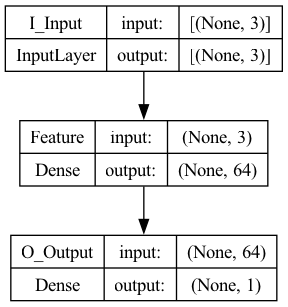

In [23]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=((3,)), name="I_Input"))
model.add(keras.layers.Dense(units=64, activation=tf.nn.relu, name="Feature"))
model.add(keras.layers.Dense(units=1, activation=tf.nn.sigmoid, name="O_Output"))
model.summary()
keras.utils.plot_model(model, "single_io_model_sequential.png", show_shapes=True)

### <ins />**2. Multi Input/Output Example**

> Sequential API works only with single input/output

---
# **Model Pattern: Keras.Model**
---

### <ins />**1. Simple Example**

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 I_Input (InputLayer)        [(None, 3)]               0         
                                                                 
 Feature (Dense)             (None, 64)                256       
                                                                 
 O_Output (Dense)            (None, 1)                 65        
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


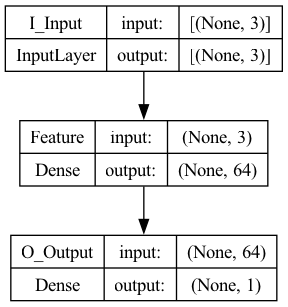

In [25]:
inputs = keras.layers.Input(shape=((3,)), name="I_Input")
features = keras.layers.Dense(units=64, activation=tf.nn.relu, name="Feature")(inputs)
outputs = keras.layers.Dense(units=1, activation=tf.nn.sigmoid, name="O_Output")(features)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()
keras.utils.plot_model(model, "single_io_model_functional.png", show_shapes=True)

### <ins />**2. Dataset**

**Description:**
- Customer ticket management system

**Input:**
- Title of ticket
- Text of ticket
- Tag of ticket

**Output:**
- Priority of ticket
- Department of ticket
- Difficulty of ticket

In [4]:
# ------------------------------
# Shapes
# ------------------------------
num_samples = 1280
num_words = 1000
num_tags = 10
num_priorities = 1
num_departments = 4
num_difficulties = 3
# ------------------------------
# Inputs
# ------------------------------
I_title = np.random.randint(low=0, high=2, size=(num_samples, num_words))
I_text = np.random.randint(low=0, high=2, size=(num_samples, num_words))
I_tag = np.random.randint(low=0, high=2, size=(num_samples, num_tags))
# ------------------------------
# Outputs
# ------------------------------
O_priority = np.random.random(size=(num_samples, num_priorities))
O_department = np.random.randint(low=0, high=2, size=(num_samples, num_departments))
O_difficulty = np.random.randint(low=0, high=2, size=(num_samples, num_difficulties))

### <ins />**3. Model Layers**

In [5]:
# ------------------------------
# Inputs
# ------------------------------
L_title = keras.layers.Input(shape=(num_words,), name="I_title")
L_text = keras.layers.Input(shape=(num_words,), name="I_text")
L_tag = keras.layers.Input(shape=(num_tags,), name="I_tag")
inputs = keras.layers.Concatenate(name="Mixing")([L_title, L_text, L_tag])
# ------------------------------
# Features
# ------------------------------
features = keras.layers.Dense(units=64, activation=tf.nn.relu, name="Feature")(inputs)
# ------------------------------
# Outputs
# ------------------------------
L_priority = keras.layers.Dense(units=num_priorities, activation=tf.nn.sigmoid, name="O_priority")(features)
L_department = keras.layers.Dense(units=num_departments, activation=tf.nn.softmax, name="O_department")(features)

### <ins />**4. Model Creation**

In [6]:
model = keras.Model(inputs=[L_title, L_text, L_tag], outputs=[L_priority, L_department])

### <ins />**5. Model Summary**

In [7]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 I_title (InputLayer)        [(None, 1000)]               0         []                            
                                                                                                  
 I_text (InputLayer)         [(None, 1000)]               0         []                            
                                                                                                  
 I_tag (InputLayer)          [(None, 10)]                 0         []                            
                                                                                                  
 Mixing (Concatenate)        (None, 2010)                 0         ['I_title[0][0]',             
                                                                     'I_text[0][0]',        

### <ins />**7. Model Visualization**

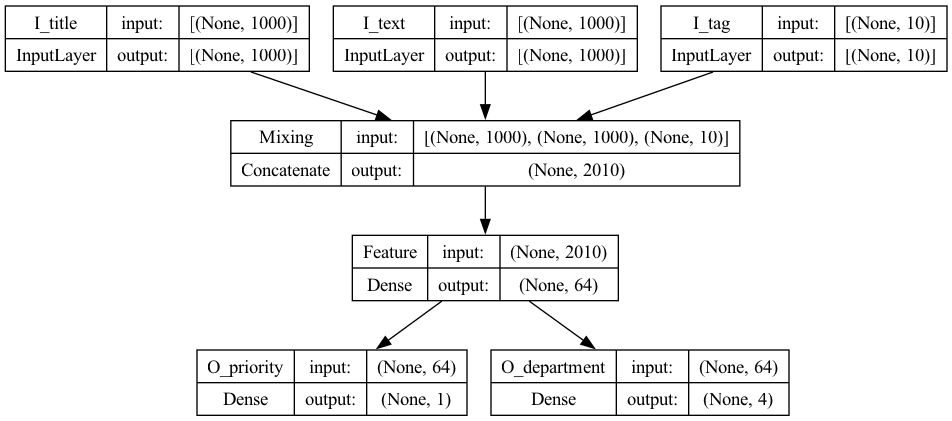

In [8]:
keras.utils.plot_model(model, "multi_io_model_functional.png", show_shapes=True)

### <ins />**8. Model Feature Extraction**

**Problem:**
- Add a new output in the model
- Do not change original model

**Solution:**
- Extract features from existing model
- Create new model using extracted features

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 I_title (InputLayer)        [(None, 1000)]               0         []                            
                                                                                                  
 I_text (InputLayer)         [(None, 1000)]               0         []                            
                                                                                                  
 I_tag (InputLayer)          [(None, 10)]                 0         []                            
                                                                                                  
 Mixing (Concatenate)        (None, 2010)                 0         ['I_title[0][0]',             
                                                                     'I_text[0][0]',        

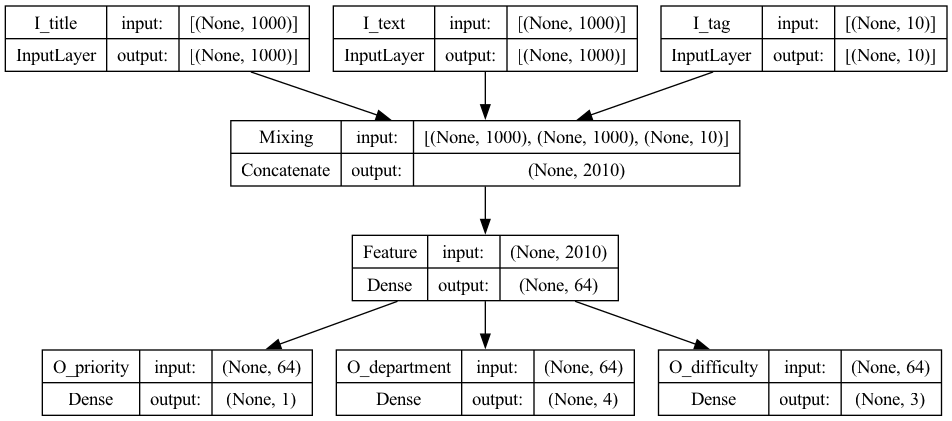

In [9]:
# ------------------------------
# Features
# ------------------------------
features = model.layers[4].output
L_difficulty = keras.layers.Dense(units=num_difficulties, activation=tf.nn.softmax, name="O_difficulty")(features)
full_model = keras.Model(inputs=[L_title, L_text, L_tag], outputs=[L_priority, L_department, L_difficulty])
full_model.summary()
keras.utils.plot_model(full_model, "multi_io_model_functional.png", show_shapes=True)

### <ins />**9. Model Configuration**

In [10]:
# ------------------------------
# Array notation can also be used
# ------------------------------
full_model.compile(
    optimizer=keras.optimizers.legacy.RMSprop(),
    loss={
        "O_priority": keras.losses.MeanSquaredError(),
        "O_department": keras.losses.CategoricalCrossentropy(),
        "O_difficulty": keras.losses.CategoricalCrossentropy(),
    },
    metrics={
        "O_priority": keras.metrics.MeanAbsoluteError(),
        "O_department": keras.metrics.CategoricalAccuracy(),
        "O_difficulty": keras.metrics.CategoricalAccuracy(),
    },
)

### <ins />**10. Model Training**

In [11]:
epochs = 1
history = full_model.fit(
    x={
        "I_title": I_title,
        "I_text": I_text,
        "I_tag": I_tag,
    },
    y={
        "O_priority": O_priority,
        "O_department": O_department,
        "O_difficulty": O_difficulty,
    },
    epochs=epochs,
    verbose=False,
)

### <ins />**11. Model Evaluation**

In [12]:
full_model.evaluate(
    x={
        "I_title": I_title,
        "I_text": I_text,
        "I_tag": I_tag,
    },
    y={
        "O_priority": O_priority,
        "O_department": O_department,
        "O_difficulty": O_difficulty,
    },
    verbose=False,
)

[5.292025566101074,
 0.12275409698486328,
 2.925628662109375,
 2.243643283843994,
 0.28545960783958435,
 0.13046875596046448,
 0.15781250596046448]

### <ins />**12. Model Prediction**

In [13]:
P_priority, P_department, P_difficulty = full_model.predict(
    x={
        "I_title": I_title,
        "I_text": I_text,
        "I_tag": I_tag,
    },
    verbose=False,
)

---
# **Subclassing Keras.Model**
---

### <ins />**1. Model Subclass**

In [14]:
class MyClass(keras.Model):
    # ------------------------------
    # Define Layers
    # ------------------------------
    def __init__(self):
        super().__init__()
        self.concat_layer = keras.layers.Concatenate()
        self.mixing_layer = keras.layers.Dense(units=64, activation=tf.nn.relu)
        self.priority_scorer = keras.layers.Dense(units=num_priorities, activation=tf.nn.sigmoid)
        self.department_classifier = keras.layers.Dense(units=num_departments, activation=tf.nn.softmax)

    # ------------------------------
    # Define Forward Pass (Prediction)
    # ------------------------------
    def call(self, inputs):
        title, text, tag = inputs
        features = self.concat_layer([title, text, tag])
        features = self.mixing_layer(features)
        P_priority = self.priority_scorer(features)
        P_department = self.department_classifier(features)
        return P_priority, P_department

### <ins />**2. Model Creation**

In [15]:
subclass_model = MyClass()

### <ins />**3. Model Configuration**

In [16]:
subclass_model.compile(
    optimizer=keras.optimizers.legacy.RMSprop(),
    loss=[keras.losses.MeanSquaredError(), keras.losses.CategoricalCrossentropy()],
    metrics=[keras.metrics.MeanAbsoluteError(), keras.metrics.CategoricalAccuracy()],
)

### <ins />**4. Model Training**

In [17]:
epochs = 1
history = subclass_model.fit(
    x=[I_title, I_text, I_tag],
    y=[O_priority, O_department],
    epochs=epochs,
    verbose=False,
)

### <ins />**5. Model Evaluation**

In [18]:
subclass_model.evaluate(
    x=[I_title, I_text, I_tag],
    y=[O_priority, O_department],
    verbose=False,
)

[3.299752712249756,
 0.11018049716949463,
 3.189572811126709,
 0.27265849709510803,
 1.0,
 0.4827005863189697,
 0.27031248807907104]

### <ins />**6. Model Prediction**

In [19]:
subclass_model.predict([I_title, I_text, I_tag])

40/40 [==============================] - 0s 448us/step


(array([[0.41284215],
        [0.30430484],
        [0.2918658 ],
        ...,
        [0.35696393],
        [0.65085065],
        [0.30259484]], dtype=float32),
 array([[0.3950192 , 0.08540218, 0.10865753, 0.4109211 ],
        [0.28232145, 0.2551087 , 0.0585053 , 0.40406448],
        [0.12569061, 0.08599258, 0.06642305, 0.7218937 ],
        ...,
        [0.5450498 , 0.07747573, 0.0401332 , 0.33734125],
        [0.14621805, 0.23108518, 0.09793799, 0.52475876],
        [0.23846172, 0.11287533, 0.05749559, 0.59116733]], dtype=float32))

### <ins />**7. Model Summary**

In [20]:
subclass_model.summary()

Model: "my_class"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 concatenate (Concatenate)   multiple                  0         
                                                                 
 dense (Dense)               multiple                  128704    
                                                                 
 dense_1 (Dense)             multiple                  65        
                                                                 
 dense_2 (Dense)             multiple                  260       
                                                                 
Total params: 129029 (504.02 KB)
Trainable params: 129029 (504.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### <ins />**8. Model Visualization**

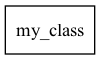

In [21]:
keras.utils.plot_model(subclass_model, "multi_io_model_subclass.png", show_shapes=True)